# British Airways Reviews Sentiment Analysis

**British Airways** is the flag carrier of the United Kingdom. It is headquartered in London, England, near its main hub at Heathrow Airport. The airline is the second largest UK-based carrier, based on fleet size and passengers carried, behind easyJet. In January 2011 BA merged with Iberia, creating the International Airlines Group (IAG), a holding company registered in Madrid, Spain. IAG is the world's third-largest airline group in terms of annual revenue and the second-largest in Europe. It is listed on the London Stock Exchange and in the FTSE 100 Index.

This project analyzes the sentiments of the customers regarding British Airways.

## Importing Dependencies

In [22]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import pandas as pd

## Loading the Data

The data came from an airline review website, and are collected through web scraping using BeatifulSoup and loaded.

In [ ]:
df2 = pd.read_csv('data/BA_reviews.csv')
df2.head()

review
0  Top Ten REASONS to not use British Airways To ...
1  Easy check in on the way to Heathrow. The flig...
2  Online check in worked fine. Quick security ch...
3  The BA first lounge at Terminal 5 was a  zoo a...
4  Paid a quick visit to Nice yesterday from Heat...

In [ ]:
df2.shape

(1000, 1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
df2.isnull().sum()

review    0
dtype: int64

## Data Preprocessing from CSV to TXT

The reviews were loaded from a CSV file, converted them into a list, iterated through list, and saved each review in a TXT file.

In [ ]:
reviews = df2['review'].values.tolist()

with open('data/rawdata.txt', 'w', encoding='utf-8') as f:
    for review in reviews:
        f.write(review + '\n')

In [ ]:
text = open('data/rawdata.txt', encoding='utf-8')
data = text.read()
print(data)

Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on the internet and

In [ ]:
ensw = stopwords.words('english')
print(ensw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Preprocessing

Irrelevant characters, stopwords, and special characters were removed.

In [ ]:
textArray = word_tokenize(data.lower())

In [ ]:
filterArray = [word for word in textArray if word not in ensw]

In [ ]:
print(filterArray)

['top', 'ten', 'reasons', 'use', 'british', 'airways', ':', 'aware', 'notice-', 'travel', 'risk', 'travelled', 'years', 'many', 'different', 'airlines', ',', 'say', 'british', 'airways', 'ranks', 'one', 'top', 'two', 'horrible', 'airlines', 'fly', '.', '’', 'waste', 'time', 'money', '.', 'customer', 'service', 'non-existent', '.', 'please', 'notice', 'purchase', 'ticket', ',', 'money', ',', 'kiss', 'customer', 'service', 'help', 'resolving', 'issue', 'goodbye', '.', 'used', 'travel', 'europe', 'worst', 'experience', 'airline', 'years', '.', 'work', 'hard', 'save', 'money', 'travel', ',', 'expect', 'good', 'experience', '.', 'welp', 'company', '.', 'sure', ',', 'makes', 'millions', 'customers', 'per', 'year', '.', 'understand', 'sometimes', 'things', 'happen', ',', 'started', 'right', 'booked', 'flight', 'bad', 'experience', 'end', 'set', 'foot', 'back', 'hometown', '.', 'please', 'take', 'note', ':', '#', '1', '-', 'customer', 'service', 'number', 'buried', 'internet', 'listed', 'websi

In [ ]:
stringFilter = ' '.join(filterArray)

In [ ]:
print(stringFilter)

top ten reasons use british airways : aware notice- travel risk travelled years many different airlines , say british airways ranks one top two horrible airlines fly . ’ waste time money . customer service non-existent . please notice purchase ticket , money , kiss customer service help resolving issue goodbye . used travel europe worst experience airline years . work hard save money travel , expect good experience . welp company . sure , makes millions customers per year . understand sometimes things happen , started right booked flight bad experience end set foot back hometown . please take note : # 1 - customer service number buried internet listed website . google still got run around someone finally answered . trust , number secret . # 2 – finally find customer service number , long wait someone answers , resolve issues . instead , pass buck whatever airlines sold ticket . one takes ownership # 4- airlines operates 365 days year around clock ’ customer service reps help , customer

In [ ]:
words = set(nltk.corpus.words.words())

In [ ]:
stringString = re.sub('\W+', '\n', stringFilter)

In [ ]:
f = open('data/newList.txt', 'w', encoding='utf-8')
f.write(stringString)
f.close()

In [ ]:
with open('data/newList.txt', 'r', encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    f = open('data/finalList.txt', 'w')
    while line:
        data = line.strip()
        if data in words:
            if len(data) > 1:
                f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [ ]:
finalText = open('data/finalList.txt', 'r')
finalData = finalText.read()

tokenWords = word_tokenize(finalData)
countWords = Counter(tokenWords)

## Feature Extraction

Text features such as text frequency and text frequency-inverse document frequency were extracted from the preprocessed data.

In [ ]:
countList = list(Counter(countWords.items()))
newList = '\n'.join([str(i) for i in countList])

In [ ]:
print(newList)

('top', 42)
('ten', 9)
('use', 90)
('aware', 10)
('notice', 12)
('travel', 130)
('risk', 11)
('travelled', 26)
('many', 89)
('different', 76)
('say', 72)
('one', 412)
('two', 165)
('horrible', 21)
('fly', 181)
('waste', 19)
('time', 474)
('money', 97)
('customer', 247)
('service', 701)
('non', 41)
('existent', 12)
('please', 14)
('purchase', 16)
('ticket', 92)
('kiss', 1)
('help', 107)
('issue', 57)
('used', 89)
('worst', 73)
('experience', 225)
('work', 74)
('hard', 45)
('save', 8)
('expect', 40)
('good', 420)
('company', 46)
('sure', 50)
('millions', 1)
('per', 15)
('year', 53)
('understand', 33)
('sometimes', 7)
('happen', 11)
('right', 36)
('booked', 174)
('flight', 1751)
('bad', 89)
('end', 43)
('set', 14)
('foot', 11)
('back', 265)
('take', 133)
('note', 12)
('number', 87)
('buried', 1)
('listed', 4)
('still', 154)
('got', 172)
('run', 32)
('around', 69)
('someone', 54)
('finally', 72)
('trust', 8)
('secret', 2)
('find', 94)
('long', 136)
('wait', 72)
('resolve', 11)
('instead', 

In [ ]:
finalData = re.sub("[)!@#$(]", "", newList)
f = open("data/frequency.csv", "w")
f.write(finalData)
f.close()

In [ ]:
posText = open('data/positive.txt', 'r')
positive = posText.read()

negText = open('data/negative.txt', encoding='ISO-8859-1')
negative = negText.read()

In [ ]:
with open('data/finalList.txt', 'r') as fp:
    line = fp.readline()
    cnt = 1
    f = open('data/positiveList.txt', 'w')
    while line:
        data = line.strip()
        if data in positive:
            if len(data) > 1:
                f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [ ]:
posListText = open('data/positiveList.txt', 'r')
posList = posListText.read()

textArray = word_tokenize(posList.lower())
filterArray = [word for word in textArray if word not in negative]

stringFilter = '\n'.join(filterArray)
stringFilter = Counter(filterArray)

print(stringFilter)

Counter({'service': 634, 'good': 384, 'first': 222, 'new': 185, 'made': 141, 'great': 129, 'took': 125, 'given': 122, 'refund': 119, 'better': 112, 'nice': 111, 'trip': 103, 'world': 102, 'excellent': 88, 'going': 75, 'received': 71, 'enough': 71, 'room': 69, 'around': 61, 'quick': 55, 'felt': 53, 'early': 52, 'give': 51, 'pretty': 46, 'working': 43, 'whole': 40, 'plus': 38, 'smooth': 36, 'amazing': 34, 'looking': 34, 'worked': 32, 'hold': 32, 'provide': 31, 'might': 31, 'taking': 31, 'fare': 30, 'keep': 30, 'together': 30, 'tiny': 29, 'forward': 29, 'clearly': 28, 'recommend': 28, 'open': 28, 'ended': 27, 'large': 26, 'upgrade': 26, 'lovely': 25, 'future': 25, 'fantastic': 25, 'receive': 24, 'except': 23, 'outstanding': 22, 'amount': 21, 'complimentary': 20, 'original': 20, 'advance': 19, 'positive': 18, 'wonderful': 18, 'gold': 17, 'accept': 16, 'send': 16, 'ready': 16, 'fresh': 15, 'improvement': 14, 'moment': 14, 'lax': 13, 'idea': 13, 'enjoyable': 12, 'incredibly': 12, 'spacious':

In [ ]:
tokenWords = word_tokenize(posList)
countList = list(Counter(tokenWords).items())
newPositiveList = '\n'.join([str(i) for i in countList])

In [ ]:
print(newPositiveList)

('top', 41)
('ten', 9)
('use', 92)
('risk', 11)
('one', 403)
('two', 162)
('time', 477)
('service', 634)
('non', 38)
('please', 14)
('help', 108)
('issue', 54)
('work', 71)
('hard', 42)
('save', 8)
('expect', 38)
('good', 384)
('sure', 42)
('per', 17)
('understand', 35)
('right', 33)
('end', 44)
('set', 14)
('back', 264)
('take', 134)
('note', 11)
('run', 31)
('around', 61)
('trust', 8)
('long', 136)
('pass', 33)
('get', 334)
('even', 216)
('refund', 119)
('play', 1)
('done', 57)
('leg', 99)
('person', 46)
('easy', 42)
('way', 124)
('early', 52)
('put', 67)
('cost', 86)
('thank', 41)
('worked', 32)
('fine', 72)
('quick', 55)
('cheap', 21)
('efficient', 63)
('ba', 1109)
('first', 222)
('late', 136)
('low', 49)
('class', 405)
('thin', 8)
('allow', 22)
('courteous', 7)
('provide', 31)
('whole', 40)
('trip', 103)
('expensive', 35)
('thought', 45)
('better', 112)
('fall', 2)
('well', 171)
('full', 146)
('nice', 111)
('go', 121)
('since', 87)
('last', 125)
('real', 27)
('round', 22)
('look',

In [ ]:
with open('data/finalList.txt', 'r') as fp:
    line = fp.readline()
    cnt = 1
    f = open('data/negativeList.txt', 'w')
    while line:
        data = line.strip()
        if data in negative:
            if len(data) > 1:
                f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [ ]:
negListText = open('data/negativeList.txt', 'r')
negList = negListText.read()

textArray = word_tokenize(negList.lower())
filterArray = [word for word in textArray if word not in positive]

stringFilter = '\n'.join(filterArray)
stringFilter = Counter(filterArray)

print(stringFilter)

Counter({'flight': 1687, 'seat': 481, 'crew': 432, 'check': 328, 'experience': 210, 'got': 166, 'bag': 158, 'due': 155, 'day': 153, 'still': 144, 'next': 125, 'make': 118, 'water': 116, 'pay': 115, 'gate': 114, 'poor': 113, 'left': 104, 'small': 98, 'used': 88, 'bad': 86, 'later': 86, 'short': 83, 'change': 82, 'front': 76, 'delay': 76, 'screen': 75, 'different': 71, 'security': 71, 'say': 69, 'worst': 69, 'came': 68, 'lost': 64, 'half': 63, 'little': 62, 'away': 58, 'want': 58, 'three': 55, 'uncomfortable': 54, 'terrible': 54, 'need': 54, 'second': 52, 'seating': 51, 'see': 49, 'try': 49, 'sent': 48, 'usual': 47, 'ask': 46, 'let': 43, 'point': 43, 'kept': 43, 'night': 43, 'total': 42, 'avoid': 41, 'lot': 41, 'big': 41, 'onto': 40, 'lack': 40, 'standard': 39, 'decided': 39, 'yet': 38, 'ago': 38, 'unfortunately': 36, 'complaint': 35, 'lady': 35, 'cramped': 34, 'cold': 34, 'speak': 34, 'course': 34, 'may': 33, 'disappointed': 33, 'busy': 33, 'tray': 32, 'feel': 31, 'wrong': 31, 'disappoi

In [ ]:
tokenWords = word_tokenize(negList)
countList = list(Counter(tokenWords).items())
newNegativeList = '\n'.join([str(i) for i in countList])

In [ ]:
print(newNegativeList)

('top', 40)
('ten', 7)
('use', 89)
('notice', 11)
('risk', 11)
('different', 71)
('say', 69)
('one', 397)
('two', 158)
('horrible', 21)
('waste', 18)
('time', 452)
('non', 40)
('existent', 12)
('please', 13)
('help', 99)
('issue', 53)
('used', 88)
('worst', 69)
('experience', 210)
('work', 71)
('hard', 41)
('expect', 39)
('sure', 49)
('per', 15)
('understand', 33)
('right', 36)
('flight', 1687)
('bad', 86)
('end', 42)
('set', 12)
('back', 256)
('take', 123)
('still', 144)
('got', 166)
('run', 30)
('trust', 7)
('secret', 1)
('long', 131)
('resolve', 11)
('pass', 31)
('buck', 3)
('get', 327)
('even', 209)
('may', 33)
('pay', 115)
('pick', 18)
('play', 2)
('stupid', 3)
('done', 55)
('leg', 90)
('person', 45)
('job', 18)
('easy', 39)
('check', 328)
('way', 117)
('put', 67)
('onto', 40)
('avoid', 41)
('cost', 80)
('thank', 41)
('fine', 70)
('security', 71)
('water', 116)
('cheap', 21)
('efficient', 55)
('ba', 1054)
('dirty', 24)
('worse', 27)
('usual', 47)
('atrocious', 4)
('gate', 114)
('l

In [ ]:
finalNegative = re.sub("[)!@#$(]", "", newNegativeList)
finalPositive = re.sub("[)!@#$(]", "", newPositiveList)

In [ ]:
p = open('data/positiveData.csv', 'w')
n = open('data/negativeData.csv', 'w')

p.write(finalPositive)
n.write(finalNegative)

p.close()
n.close()

## Sentiment Analysis

Reviews were analyzed whether it positive, negative, or neutral based on the extracted features using machine learning algorithms for sentiment analysis.

In [2]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
analyzer = SentimentIntensityAnalyzer()

In [4]:
text = open('data/rawdata.txt', 'r', encoding='utf-8')
data = text.read()

In [5]:
count = list(analyzer.polarity_scores(data).items())
vs = '\n'.join([str(i) for i in count])

csvFileFormat = re.sub("[)!@#$(]", "", vs)
print(csvFileFormat)

'neg', 0.088
'neu', 0.797
'pos', 0.116
'compound', 1.0


In [6]:
f = open('data/polarity.csv', 'w')
f.write('Polarity, Value\n')
f.write(csvFileFormat)
f.close()

In [7]:
path = 'data/rawdata.txt'

with open(path, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('data/polarityList.txt', 'w')
    while line:
        data = line.strip()
        countList = list(analyzer.polarity_scores(data).items())
        vs = ':'.join([str(i) for i in countList])
        fa.write(vs + '\n')
        print(vs)
        line = fp.readline()
        cnt += 1

('neg', 0.088):('neu', 0.826):('pos', 0.087):('compound', -0.7535)
('neg', 0.065):('neu', 0.882):('pos', 0.053):('compound', -0.0516)
('neg', 0.0):('neu', 0.702):('pos', 0.298):('compound', 0.8479)
('neg', 0.095):('neu', 0.836):('pos', 0.069):('compound', -0.1289)
('neg', 0.056):('neu', 0.82):('pos', 0.124):('compound', 0.9738)
('neg', 0.18):('neu', 0.767):('pos', 0.053):('compound', -0.9746)
('neg', 0.147):('neu', 0.843):('pos', 0.01):('compound', -0.9649)
('neg', 0.168):('neu', 0.751):('pos', 0.081):('compound', -0.789)
('neg', 0.0):('neu', 0.0):('pos', 0.0):('compound', 0.0)
('neg', 0.0):('neu', 0.0):('pos', 0.0):('compound', 0.0)
('neg', 0.076):('neu', 0.9):('pos', 0.024):('compound', -0.6334)
('neg', 0.039):('neu', 0.811):('pos', 0.15):('compound', 0.8898)
('neg', 0.082):('neu', 0.794):('pos', 0.124):('compound', 0.8782)
('neg', 0.087):('neu', 0.891):('pos', 0.022):('compound', -0.7894)
('neg', 0.106):('neu', 0.878):('pos', 0.016):('compound', -0.981)
('neg', 0.104):('neu', 0.862)

In [9]:
text = open('data/polarityList.txt', 'r')
polarity = text.read()
Format = re.sub("[)!@''#$(pos,neu,neg,compound]", '', polarity)
csvFileFormat = re.sub(':',',', Format)
print('Negative, Neutral, Positive, Compound')
print(csvFileFormat)

Negative, Neutral, Positive, Compound
 0.088, 0.826, 0.087, -0.7535
 0.065, 0.882, 0.053, -0.0516
 0.0, 0.702, 0.298, 0.8479
 0.095, 0.836, 0.069, -0.1289
 0.056, 0.82, 0.124, 0.9738
 0.18, 0.767, 0.053, -0.9746
 0.147, 0.843, 0.01, -0.9649
 0.168, 0.751, 0.081, -0.789
 0.0, 0.0, 0.0, 0.0
 0.0, 0.0, 0.0, 0.0
 0.076, 0.9, 0.024, -0.6334
 0.039, 0.811, 0.15, 0.8898
 0.082, 0.794, 0.124, 0.8782
 0.087, 0.891, 0.022, -0.7894
 0.106, 0.878, 0.016, -0.981
 0.104, 0.862, 0.033, -0.5719
 0.171, 0.829, 0.0, -0.8519
 0.12, 0.795, 0.084, -0.2382
 0.098, 0.826, 0.076, -0.7786
 0.064, 0.91, 0.025, -0.9455
 0.107, 0.86, 0.033, -0.7881
 0.094, 0.871, 0.035, -0.789
 0.151, 0.849, 0.0, -0.8537
 0.073, 0.688, 0.239, 0.9601
 0.092, 0.871, 0.036, -0.8055
 0.099, 0.763, 0.138, 0.1015
 0.147, 0.806, 0.048, -0.96
 0.131, 0.782, 0.087, -0.851
 0.051, 0.857, 0.092, 0.9251
 0.105, 0.867, 0.029, -0.9372
 0.043, 0.951, 0.006, -0.7428
 0.313, 0.687, 0.0, -0.9392
 0.114, 0.824, 0.062, -0.5681
 0.174, 0.767, 0.059, 

In [14]:
f = open('data/polarityList.csv', 'w')
f.write('Negative, Neutral, Positive, Compound\n')
f.write(csvFileFormat)
f.close()

In [11]:
analysis = TextBlob(data)
List = list(analysis.sentiment)
newList = ','.join([str(i) for i in List])
print('Polarity, Subjectivity')
print(newList)

Polarity, Subjectivity
0.21202380952380948,0.47630952380952385


In [15]:
f = open('data/sentiment.csv', 'w')
f.write('Polarity,Subjectivity\n')
f.write(newList)
f.close()

In [16]:
path = 'data/rawdata.txt'

with open(path, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('data/sentimentList.csv', 'w')
    print('Polarity,Subjectivity')
    fa.write('Polarity,Subjectivity\n')
    while line:
        data = line.strip()
        analysis = TextBlob(data)
        countList = list(analysis.sentiment)
        vs = ','.join([str(i) for i in countList])
        fa.write(vs + '\n')
        print(vs)
        line = fp.readline()
        cnt += 1

Polarity,Subjectivity
0.04720853858784895,0.533032293377121
0.09666666666666668,0.3066666666666667
0.41111111111111115,0.6166666666666667
-0.08971193415637856,0.49985302763080547
0.20946969696969697,0.45098484848484843
-0.22796378968253966,0.5632837301587301
-0.23392857142857137,0.47619047619047616
-0.2708333333333333,0.5402777777777777
0.0,0.0
0.0,0.0
0.0062500000000000056,0.19375
0.03582251082251083,0.45740259740259737
0.1446819384319384,0.5522246272246272
0.07129629629629629,0.442283950617284
-0.05950980392156863,0.41000000000000003
-0.45,0.525
0.004999999999999993,0.5826923076923077
0.03863636363636363,0.36666666666666664
-0.031276595744680856,0.6049290780141844
-0.07166666666666667,0.36416666666666664
-0.10437500000000002,0.35333333333333333
-0.0033333333333333457,0.6333333333333333
-0.21666666666666665,0.26666666666666666
0.3881060606060606,0.6227272727272727
-0.11958333333333333,0.48083333333333333
0.15,0.5666666666666667
-0.06232142857142858,0.557797619047619
-0.002232142857142

## Reviews WordCloud

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
text = open('data/finalList.txt', 'r')
data = text.read()

### Total Reviews WordCloud

This wordcloud shows the most frequently occurring words in the customer reviews. The font size of each word represents the frequency, meaning the bigger the font size of the word, the more frequent it was used in the reviews.

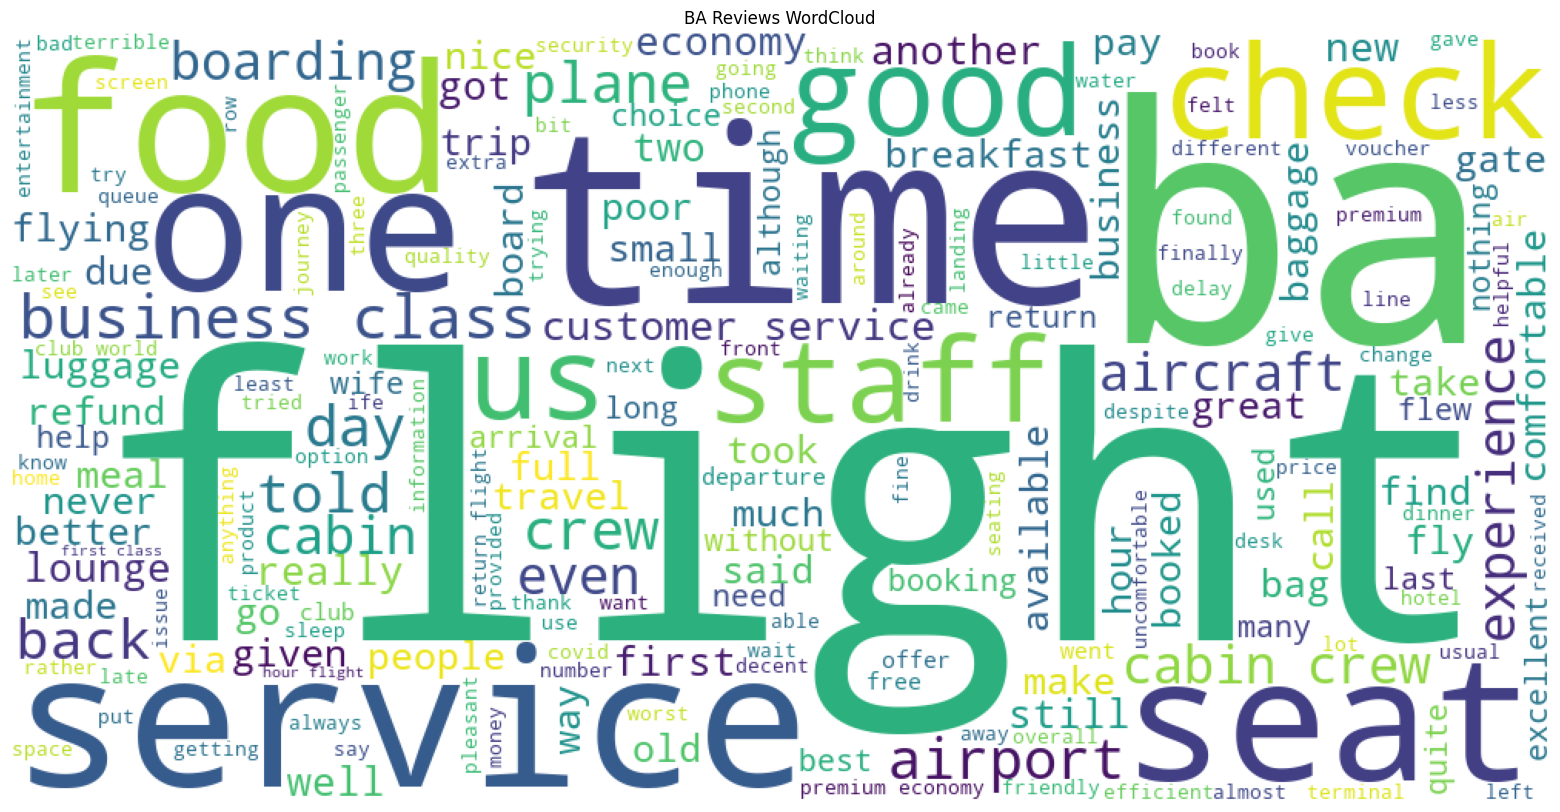

In [19]:
plt.figure(figsize=(20, 10))
wordCloud = WordCloud(mode='RGB', background_color='white', width=1000, height=500).generate(data)
plt.title('BA Reviews WordCloud')
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### Positive Reviews WordCloud

This wordcloud shows the frequently occurring positive words in the reviews. The font size of each word represents the frequency, meaning the bigger the font size of the word, the more frequent it was used in the reviews. As shown in the wordcloud, words "time" and "service" were two of the most common positive words without giving the context of the sentence those were based on.

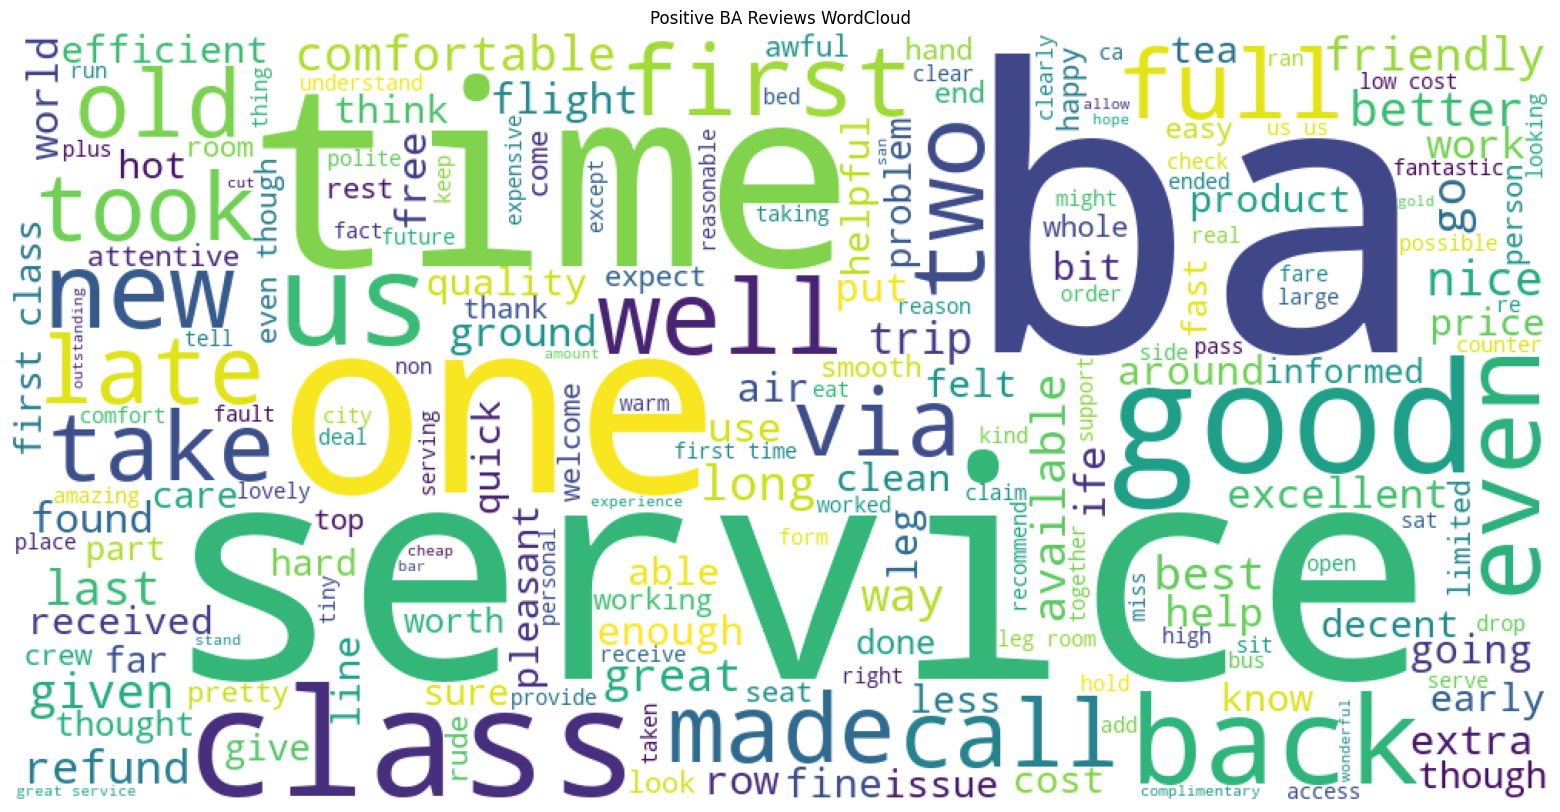

In [20]:
text = open('data/positiveList.txt', 'r')
data = text.read()
plt.figure(figsize=(20, 10))
wordCloud = WordCloud(mode='RGB', background_color='white', width=1000, height=500).generate(data)
plt.title('Positive BA Reviews WordCloud')
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### Negative Reviews WordCloud

This wordcloud shows the frequently occurring negative words in the reviews. The font size of each word represents the frequency, meaning the bigger the font size of the word, the more frequent it was used in the reviews. As shown in the wordcloud, word "flight" was the most common negative word without giving the context of the sentence those were based on.

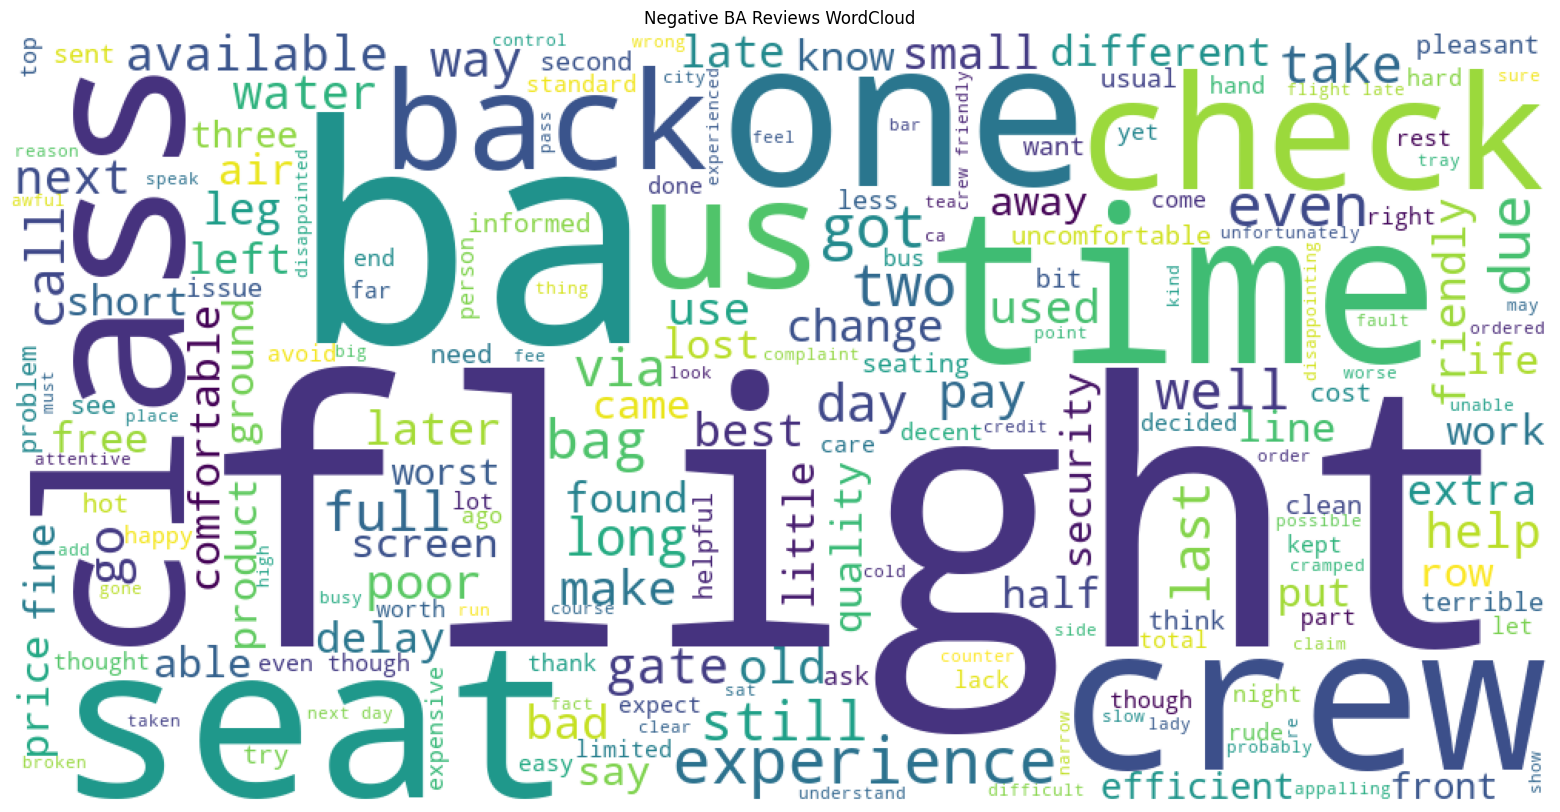

In [23]:
text = open('data/negativeList.txt', 'r')
data = text.read()
plt.figure(figsize=(20, 10))
wordCloud = WordCloud(mode='RGB', background_color='white', width=1000, height=500).generate(data)
plt.title('Negative BA Reviews WordCloud')
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Data Visualization

The results were visualized using scatter plot and histogram to present trends and patterns. The graphs showed that:
- The polarity of the reviews were mostly neutral despite several reports about the technical issues of the airline.
- The reviews were half subjective and half objective, as if half the reviews were a common knowledge regarding the airline.

In [24]:
from matplotlib import style
import numpy as np

In [35]:
path = 'data/rawdata.txt'

with open(path, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('data/newSentimentList.csv', 'w')

    while line:
        data = line.strip()
        analysis = TextBlob(data)
        countList = list(analysis.sentiment)
        vs = ','.join([str(i) for i in countList])
        fa.write(vs + ',' + str(cnt) + '\n')
        line = fp.readline()
        cnt += 1

C:\Users\PCX\AppData\Local\Temp\ipykernel_988\1725724700.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


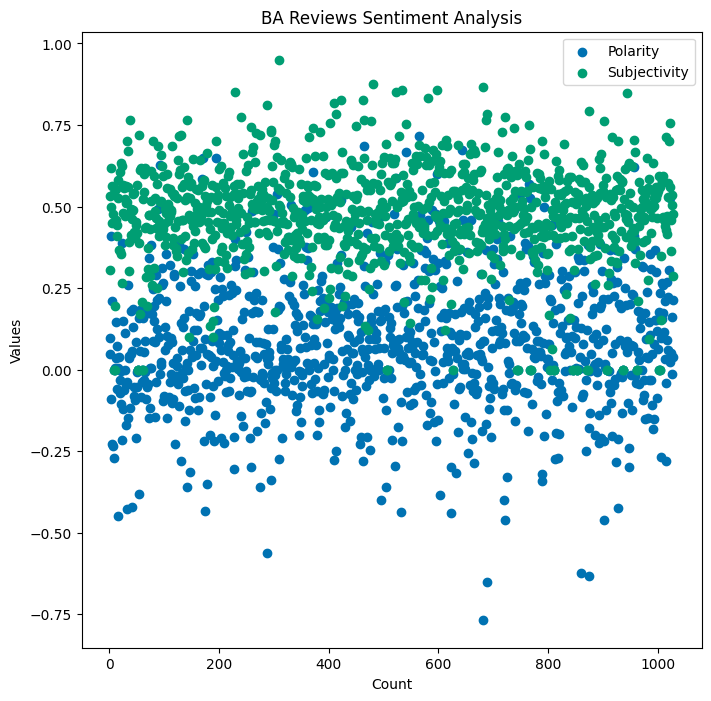

In [29]:
style.use('seaborn-colorblind')
plt.figure(figsize=(8, 8))
df = pd.read_csv('data/newSentimentList.csv')
plt.scatter(data=df, x='Count', y='Polarity')
plt.scatter(data=df, x='Count', y='Subjectivity')
plt.xlabel('Count')
plt.ylabel('Values')
plt.legend()
plt.title('BA Reviews Sentiment Analysis')
plt.show()

C:\Users\PCX\AppData\Local\Temp\ipykernel_988\973269422.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


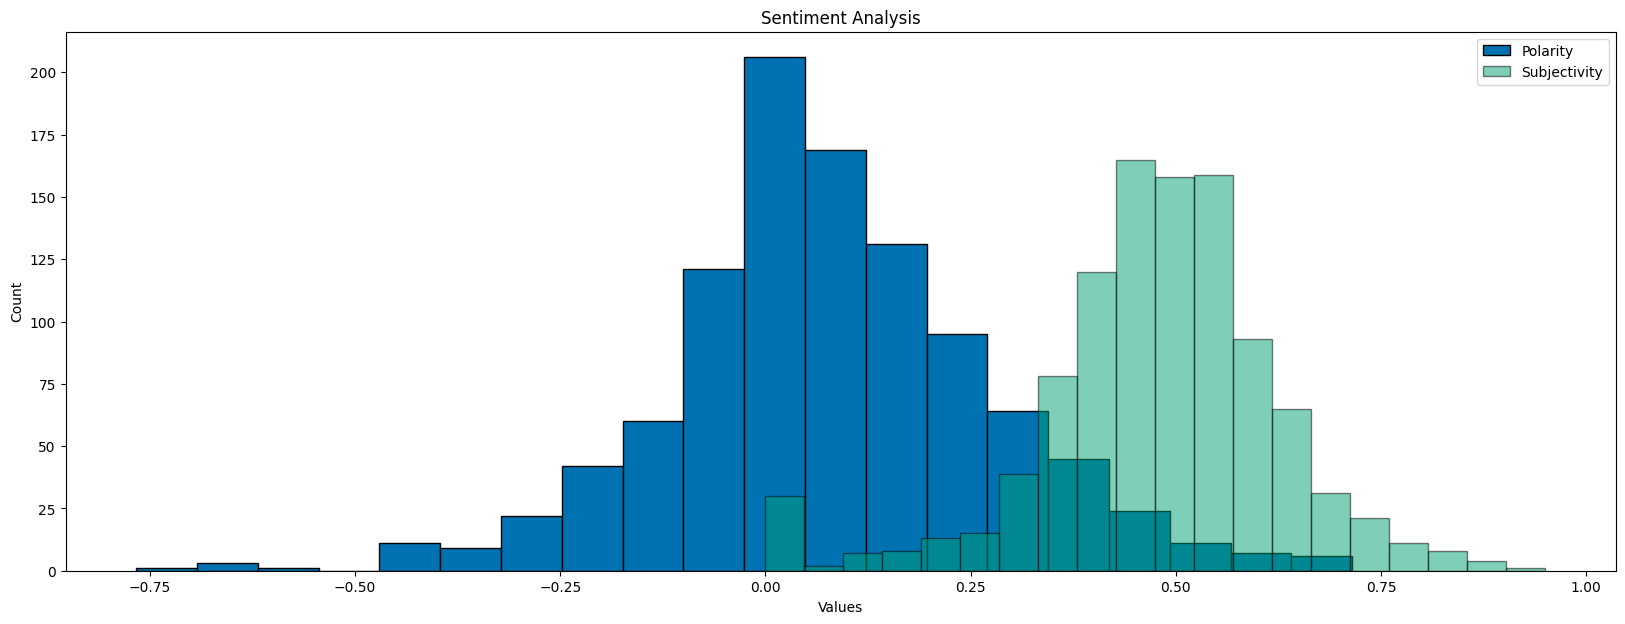

In [33]:
plt.figure(figsize=(20, 7))
plt.hist(df['Polarity'], bins=20, label='Polarity', edgecolor='black')
plt.hist(df['Subjectivity'], bins=20, label='Subjectivity', edgecolor='black', alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.title('Sentiment Analysis')
plt.show()